#Proportions

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import numpy as np

https://www.evanmiller.org/ab-testing/sample-size.html

In [91]:
#Минимальный эффект	
mde = 0.05 
#Базовая конверсия	
baseline = 0.2
#Размер выборки по эвану миллеру 
sample_size = 1030
#уровень значимости α	
alpha=0.05

##Тестируем Z-TEST 

In [6]:
from statsmodels.stats.proportion import proportions_ztest

In [7]:
from tqdm import tqdm

In [43]:
#A/B тестирование, запускаем bootstrap, проводим 10000 экспериментов
result = []
for _ in tqdm(range(10000)):
  #смоделируем бинарное распределение
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████| 10000/10000 [00:02<00:00, 4722.17it/s]


In [44]:
#значение p-value 
t_z_test = pd.Series(result)
t_z_test[:10]

0    3.095457e-03
1    5.760144e-02
2    2.232336e-02
3    2.929625e-01
4    9.708335e-04
5    3.135639e-05
6    3.494351e-04
7    6.330195e-03
8    4.467026e-07
9    8.429282e-03
dtype: float64

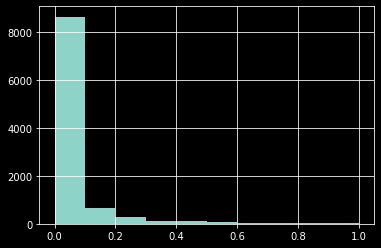

In [45]:
#распределение значений p-value
t_z_test.hist()

Мощность, которую задавали у Эвана Миллера совпадает 

In [46]:
(t_z_test< 0.05).mean()

0.7834

In [64]:
#A/A тестирование
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████| 10000/10000 [00:03<00:00, 2882.01it/s]


In [49]:
t_z_test = pd.Series(result)
t_z_test[:10]

0    0.692956
1    0.199183
2    0.622895
3    0.705516
4    0.298348
5    0.868394
6    0.003781
7    0.825928
8    0.415704
9    0.441452
dtype: float64

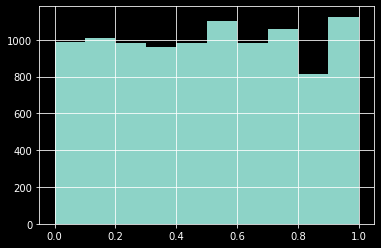

In [50]:
#распределение значений уровня значимости
t_z_test.hist()

Уровень значимости alpha совпадает

In [51]:
(t_z_test< 0.05).mean()

0.0505

##Тестируем T-TEST 





In [52]:
from scipy.stats import ttest_ind, mannwhitneyu

In [53]:
#A/B тестирование
result = []
for _ in tqdm(range(10000)): 
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

100%|██████████| 10000/10000 [00:03<00:00, 2777.14it/s]


In [56]:
#распределение значений p-value
t_t_test = pd.Series(result)

Мощность, которую задавали у Эвана Миллера совпадает 

In [60]:
(t_t_test < 0.05).mean()

0.7708

In [61]:
#A/A тестирование
result = []
for _ in tqdm(range(10000)): 
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

100%|██████████| 10000/10000 [00:04<00:00, 2347.34it/s]


In [62]:
#распределение значений уровня значимости alpha
t_t_test = pd.Series(result)

значение уровня значимости, которую задавали

In [63]:
(t_t_test < 0.05).mean()

0.0483

##Тестируем Mann–Whitney U test

In [65]:
from scipy.stats import mannwhitneyu

In [66]:
#A/B тестирование
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

100%|██████████| 10000/10000 [00:15<00:00, 636.63it/s]


In [67]:
t_m_w = pd.Series(result)

Мощность, которую задавали у Эвана Миллера совпадает 

In [68]:
(t < 0.05).mean()

0.7824

In [69]:
#A-A тестирование
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

100%|██████████| 10000/10000 [00:19<00:00, 511.05it/s]


In [70]:
t_m_u = pd.Series(result)

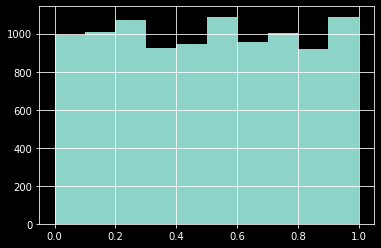

In [71]:
t_m_u.hist()

In [23]:
import seaborn as sns

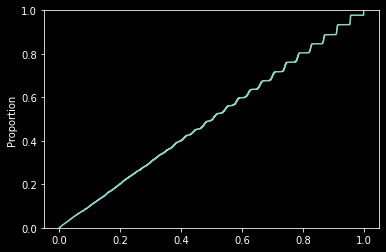

In [24]:
sns.ecdfplot(t)

Уровень значимости, которую задавали

In [72]:
(t_m_u < 0.05).mean()

0.0518

## Определение размеров выборок в питоне

In [73]:
#забиваем параметры, которые задавали у Эвана Миллера
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [75]:
#и вот что получается
sample_size

1092

In [78]:
#по этому размеру выборки проводим z-test
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████| 10000/10000 [00:02<00:00, 4678.91it/s]


In [79]:
t = pd.Series(result)

In [80]:
#мощность пуля в пулю
(t < 0.05).mean() 

0.8024

Посчитаем размеры для неравных выборок. Берем отношение 1/3.

In [36]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [37]:
sample_size1

2184

In [38]:
sample_size2 = round(sample_size1 * 1/3)

In [39]:
sample_size2

728

In [40]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size1)
  b = np.random.binomial(1,baseline + mde,size=sample_size2)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████| 10000/10000 [00:03<00:00, 3060.72it/s]


In [41]:
t = pd.Series(result)

In [42]:
(t < 0.05).mean()

0.8014

Возьмем другой пример, конверсия 40%, хотим задетектить разницу в 8%

In [87]:
#размер выборки
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.40, 0.48)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

602.9946935760591

In [88]:
sample_size = 602
baseline = 0.4
mde = 0.08
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

100%|██████████| 1000/1000 [00:00<00:00, 5499.39it/s]


In [89]:
t = pd.Series(result)

In [90]:
#мощность, которую задавали
(t < 0.05).mean()

0.805

#Continious

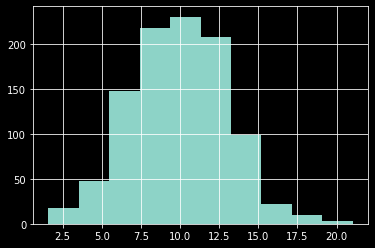

In [ ]:
#контрольная выборка с средним значением 10, стандартное отклонение 3
pd.Series(np.random.normal(10,3,size=1000)).hist()

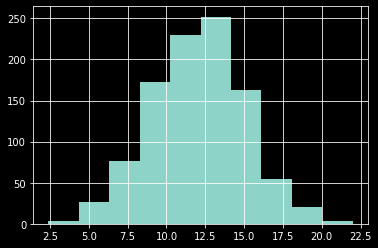

In [ ]:
#тестовая выборка с средним значением 12, стандартное отклонение 3
pd.Series(np.random.normal(12,3,size=1000)).hist()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
from tqdm import tqdm

Определение размера выборки

In [ ]:
baseline = 10
mde = 2

In [ ]:
import statsmodels.stats.api as sms

In [ ]:
sample = pd.Series(np.random.normal(10,3,size=1000))

In [ ]:
sample.std()

2.962230201666108

In [ ]:
es = ((baseline+mde) - baseline) / sample.std()

In [ ]:
#размер выборки
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

36.1662388430244

In [ ]:
#запускаем t-test
result = []
n = 10000
sample_size = 36
for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline + mde,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

100%|██████████| 10000/10000 [00:02<00:00, 4338.68it/s]


In [ ]:
t = pd.Series(result)

In [ ]:
#мощность 80%
(t < 0.05).mean()

0.7964

Проверим как распределено выборочное среднее

In [ ]:
t = pd.Series([np.random.normal(10,3,size=36).mean() for _ in range(1000)])

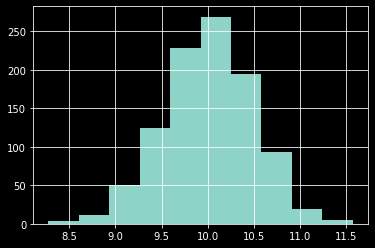

In [ ]:
t.hist()

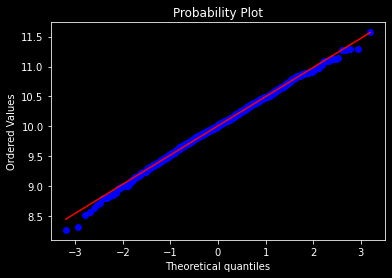

In [ ]:
import pylab 
import scipy.stats as stats
   
stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

In [ ]:
#для примера, выборка с длинным хвостом со средним значением 2
t = pd.Series(np.random.pareto(2,size=100))

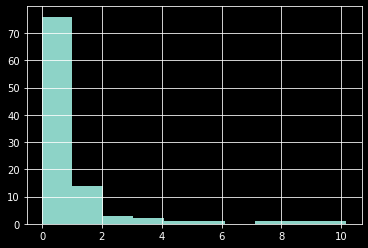

In [ ]:
t.hist()

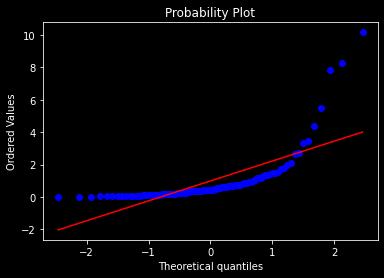

In [ ]:
#демонстрация графика для такой выборки
stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

In [ ]:
baseline = 10
mde = 2
result = []
n = 10000
sample_size = 36
for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

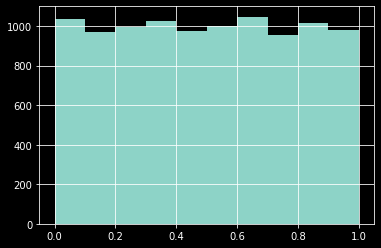

In [ ]:
t.hist()

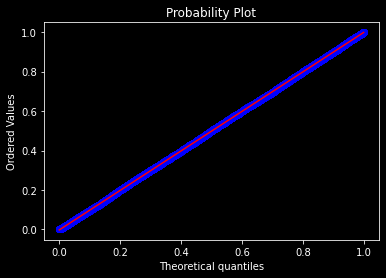

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
#уровень значимости
(t < 0.05).mean()

0.0528

Как проверить, что можно применять t test:  
- выборочное среднее распределено нормально  
- p-value для выборок из одного распределения имеет равномерное распределение 
